In [1]:
import ROOT
import ctypes

Welcome to JupyROOT 6.26/04


In [2]:

sig_1ab_file = ROOT.TFile.Open("/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/topo/resultfile/result_rho/standard.root")
signal_1ab_tree = sig_1ab_file.Get("rho")


In [3]:
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.67,2.06)
# D0_M_TH1F = ROOT.TH1F("D0_M_TH1F","D0 mass",50,1.72,1.92)
# D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 2.06)
D0_M_TH1F_2 = ROOT.TH1F("D0_M_TH1F_2","D0 mass",50,1.67, 1.9)
D0_cosHel_TH1F = ROOT.TH1F("D0_cosHel_TH1F","D0_cosHel",50, -1, 1)


In [4]:
def extract_histo(tree, histogram):
    for event in tree:
        histogram.Fill(event.D0_M)
    return histogram

In [5]:
def extract_hist_coshel(tree, histogram):
    for event in tree:
        if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 2.06 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_cosHel_0)
    return histogram

In [6]:
def apply_cuts(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        if event.D0_M > 1.78 and event.D0_M < 1.92:

            histogram.Fill(event.D0_M)
    return histogram

In [7]:
def extract_signals(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06:
        # if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 2.06:
        if event.iCascDcyBrP_Dst_0 ==0 and event.D0_M > 1.67 and event.D0_M < 1.9 and event.Belle2Pi0Veto_75MeV > 0.022:

            histogram.Fill(event.D0_M)
    return histogram

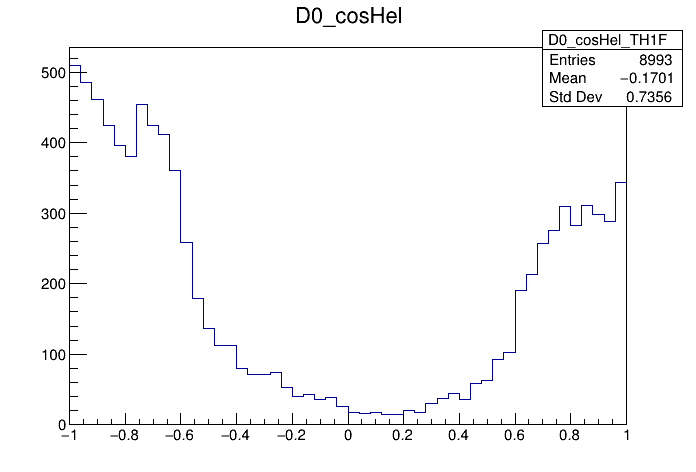

In [8]:
D0_cosHel_TH1F = extract_hist_coshel(signal_1ab_tree, D0_cosHel_TH1F)
c1 = ROOT.TCanvas()
D0_cosHel_TH1F.Draw()
c1.Draw()

In [9]:

# D0_M_TH1F = apply_cuts(signal_tree, D0_M_TH1F)
# c1 = ROOT.TCanvas()
# D0_M_TH1F.Draw()
# c1.Draw()

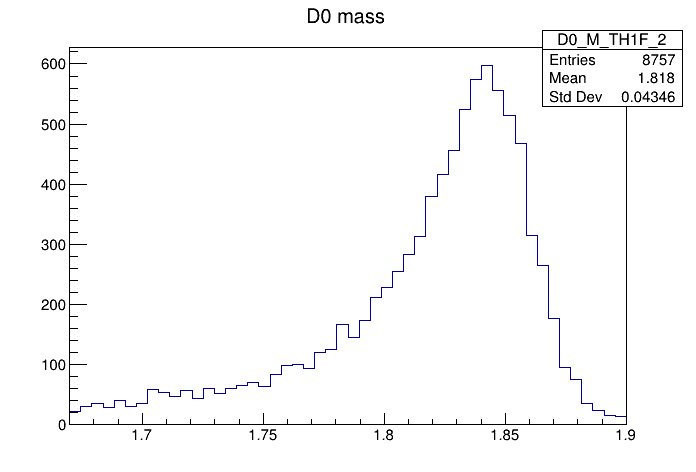

In [10]:

D0_M_TH1F_2 = extract_signals(signal_1ab_tree, D0_M_TH1F_2)
# D0_M_TH1F_2 = apply_cuts(signal_1ab_tree, D0_M_TH1F_2)

c1 = ROOT.TCanvas()
D0_M_TH1F_2.Draw()
c1.Draw()

In [11]:

# scale_factor = D0_M_TH1F_2.GetEntries()/D0_M_TH1F.GetEntries()

In [12]:
# scale_factor

# D0_M

In [13]:
fitting_region = (1.67, 1.9)
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
l = ROOT.RooArgList(x)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F_2, 1)


In [14]:

mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.84,1.83, 1.86)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.03,0,0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.02,0,0.5)
alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,2)
n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 5,0,10)
 
Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


sigma3 = ROOT.RooRealVar("sigma3", "width of gaussians", 0.02,0,0.5)
alpha2 = ROOT.RooRealVar("alph2", "width of gaussians", 0.5,0,2)
n_CB2 = ROOT.RooRealVar("n_CB2", "width of gaussians", 5,0,10)

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 0.5] of the RooGaussian 'sig1' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.67,1.9]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.67,1.9]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_model_sighist' created with bounds [1.67,1.9]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#0] ERROR:Integration --  RooNumIntFactory::Init : libRooFitMore cannot be loaded. GSL integrators will not beavailable !

cling::DynamicLibraryManager::loadLibrary(): libgsl.so.25: cannot open shared object file: No such file or directory
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/rhogamma/rho_massveto_1ab_Vpi0.png has been created


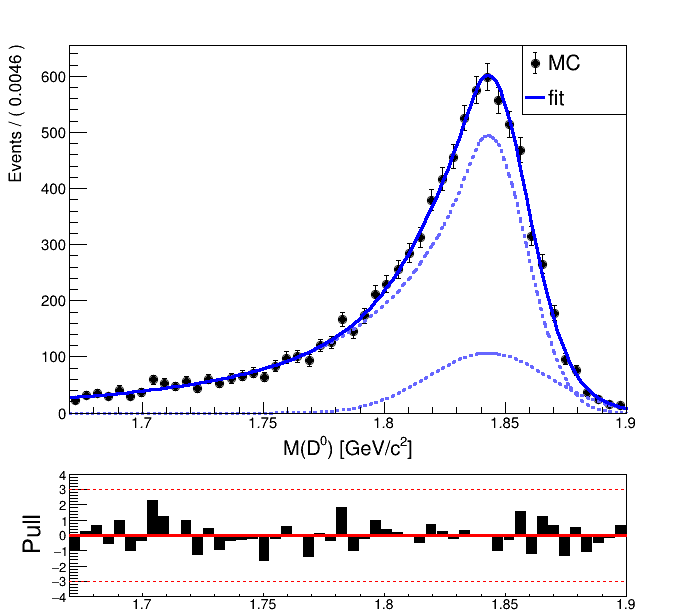

In [15]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig1 = ROOT.RooNovosibirsk("sig1", "Signal component 3", x, mean, Novo_width, Novo_tail)
# sig1 = ROOT.RooNovosibirsk("sig1", "Signal component 3", x, Novo_peak, Novo_width, Novo_tail)
# sig1 = ROOT.RooCBShape("sig1", "Signal component 2", x, mean, sigma3, alpha2, n_CB2)


sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)



# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

model = ROOT.RooAddPdf("model", "model", [sig1, sig2], sig1frac)


# r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)
r = model.fitTo(signalhist,NumCPU=12,Range=(1.67,1.9),PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

signalhist.plotOn(frame,Name = "data1", XErrorSize=0)

model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/rhogamma/rho_massveto_1ab_Vpi0.png")

f = ROOT.TFile("phig_signalMC_fitresult.root", "RECREATE")
r.Write("phig_sig")
f.Close()


In [16]:
model.Print("t")

0x557ace8757b0 RooAddPdf::model = 0.252812 [Auto,Dirty] 
  0x557ad8d56f40/V- RooGaussian::sig1 = 0.0662173 [Auto,Dirty] 
    0x557ad37dfa10/V- RooRealVar::M(D^{0}) = 1.785
    0x557ace886e80/V- RooRealVar::mean = 1.84293 +/- 0.000569747
    0x557ace8c5c70/V- RooRealVar::sigma1 = 0.02486 +/- 0.00233645
  0x557ad8dda500/V- RooRealVar::sig1frac = 0.163261 +/- 0.0517358
  0x557ad7a77d10/V- RooCBShape::sig2 = 0.28922 [Auto,Dirty] 
    0x557ad37dfa10/V- RooRealVar::M(D^{0}) = 1.785
    0x557ace886e80/V- RooRealVar::mean = 1.84293 +/- 0.000569747
    0x557ace8910b0/V- RooRealVar::sigma2 = 0.0156082 +/- 0.000665082
    0x557ace899600/V- RooRealVar::alpha = 0.420666 +/- 0.0557527
    0x557ace896440/V- RooRealVar::n_CB = 3.2305 +/- 0.627351


In [17]:
f = ROOT.TFile.Open("phig_signalMC_fitresult.root")
r2 = ROOT.gDirectory.Get("phig_sig")
f.Close()


In [18]:
r2.Print()


  RooFitResult: minimized FCN value: -16667.2, estimated distance to minimum: 1.68254e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                 alpha    4.2067e-01 +/-  5.58e-02
                  mean    1.8429e+00 +/-  5.70e-04
                  n_CB    3.2305e+00 +/-  6.27e-01
              sig1frac    1.6326e-01 +/-  5.17e-02
                sigma1    2.4860e-02 +/-  2.34e-03
                sigma2    1.5608e-02 +/-  6.65e-04



In [19]:
r2.correlation("alpha","n_CB")

-0.8028099790771626

In [20]:
r2.edm()

1.6825369468836685e-05

In [21]:
r2.correlationMatrix()

<cppyy.gbl.TMatrixTSym<double> object at 0x557ada7d5f30>

# cosHel

In [22]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared", "x,c0", "", "c0*x*x")
ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared.cxx+")

93986260570704

(MyPdf_xsquared) An instance of MyPdf_xsquared.


In [23]:
# ROOT.RooClassFactory.makePdf("MyPdf_xsquared_nopara", "x", "", "x*x")
# ROOT.gROOT.ProcessLineSync(".x MyPdf_xsquared_nopara.cxx+")

In [24]:
fitting_region = (-1, 1)
y = ROOT.RooRealVar("cos#theta_{H}", "cos#theta_{H}", fitting_region[0], fitting_region[1], "")
# y.setBins(50)
y_l = ROOT.RooArgList(y)
# signalhist = ROOT.RooDataHist("sighist", "sighist", l, D0_M_TH1F, scale_factor)
y_signalhist = ROOT.RooDataHist("y_signalhist", "sighist", y_l, D0_cosHel_TH1F, 1)


In [25]:
y_mean1 = ROOT.RooRealVar("y_mean1", "mean of gaussians", -0.7,-0.8, -0.6)
y_mean2 = ROOT.RooRealVar("y_mean2", "mean of gaussians", 0.9,0.8, 1.2)

y_sigma1 = ROOT.RooRealVar("y_sigma1", "width of gaussians", 0.03,0,0.2)
y_sigma2 = ROOT.RooRealVar("y_sigma2", "width of gaussians", 0.1,0,0.2)

c0 = ROOT.RooRealVar("c0", "c0",0.2, 0,1)


Cheby_c0 = ROOT.RooRealVar("Cheby_c0", "c0",0.2, -1,1)
Cheby_c1 = ROOT.RooRealVar("Cheby_c1", "c0",0.2, -1,1)
Cheby_c2 = ROOT.RooRealVar("Cheby_c2", "c0",-0.2, -1,1)


[#0] WARNING:InputArguments -- The parameter 'y_sigma1' with range [0, 0.2] of the RooGaussian 'sig2_1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'y_sigma2' with range [0, 0.2] of the RooGaussian 'sig2_2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- RooRealVar::setRange(cos#theta_{H}) new range named 'fit' created with bounds [-1,1]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_y_signalhist) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(cos#theta_{H}) new range named 'NormalizationRangeForfit' created with bounds [-1,1]
[#1] INFO:Eval -- RooRealVar::setRange(cos#theta_{H}) new range named 'fit_nll_model_y_signalhist' created with bounds [-1,1]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_y_signalhist) fixing interpretati

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file /media/jykim/T7/saved_plots/fitting/results/rhogamma/rho_massveto_1ab_Vpi0_coshel.png has been created


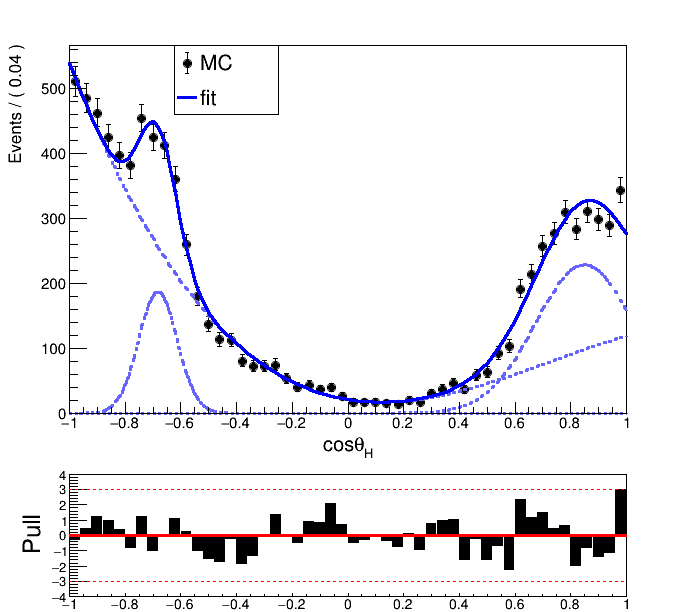

In [26]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))


# y_bkg1_model = ROOT.MyPdf_xsquared_nopara("y_bkg1_model", "y_bkg1", y)
# model = ROOT.MyPdf_xsquared_nopara("model", "y_bkg1", y)
# sig1 = ROOT.MyPdf_xsquared_nopara("sig1", "y_bkg1", y)
# sig1 = ROOT.MyPdf_xsquared("sig1", "y_bkg1", y, c0)


sig2_1 = ROOT.RooGaussian("sig2_1", "Signal component 1", y, y_mean1, y_sigma1)
sig2_2 = ROOT.RooGaussian("sig2_2", "Signal component 1", y, y_mean2, y_sigma2)

frac2 = ROOT.RooRealVar("frac2", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig2 = ROOT.RooAddPdf("sig2", "model", [sig2_1, sig2_2], frac2)


sig3 = ROOT.RooChebychev("sig3", "Signal component 1", y, ROOT.RooArgList(Cheby_c0, Cheby_c1, Cheby_c2))

# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig2frac = ROOT.RooRealVar("sig2frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)


# model = ROOT.RooCBShape("model", "Signal component 2", x, mean, sigma2, alpha, n_CB)

# sig_model1 = ROOT.RooAddPdf("sig_model1", "model", [sig1, sig2], sig1frac)
model = ROOT.RooAddPdf("model", "model", [sig3, sig2], sig2frac)




run = model.fitTo(y_signalhist,NumCPU=12,Range=(-1,1),PrintLevel=-1, Save=1)
# run = model.fitTo(y_signalhist,NumCPU=12,Range=(-1,1),PrintLevel=-1)

run.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = y.frame(Title=" ")

y_signalhist.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2_1, LineStyle=ROOT.kDashed, LineColor=593)
model.plotOn(frame, Name="CB1", Components=sig2_2, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.25, 0.75, 0.4, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = y.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("/media/jykim/T7/saved_plots/fitting/results/rhogamma/rho_massveto_1ab_Vpi0_coshel.png")

f = ROOT.TFile("phig_signalMC_fitresult.root", "RECREATE")
r.Write("phig_sig")
f.Close()


In [27]:
model.Print("t")

0x557ae1951240 RooAddPdf::model = 0.0816386 [Auto,Dirty] 
  0x557ad7a77d10/V- RooChebychev::sig3 = 0.119023 [Auto,Dirty] 
    0x557ae196cd10/V- RooRealVar::cos#theta_{H} = 0
    0x557ae17173d0/V- RooRealVar::Cheby_c0 = -0.999988 +/- 0.0789534
    0x557ad8fe34c0/V- RooRealVar::Cheby_c1 = 0.880977 +/- 0.00877508
    0x557ae1ae09e0/V- RooRealVar::Cheby_c2 = -0.202329 +/- 0.0253137
  0x557ae1ab28f0/V- RooRealVar::sig2frac = 0.685891 +/- 0.0179624
  0x557ae1aef6e0/V- RooAddPdf::sig2 = 5.73175e-06 [Auto,Dirty] 
    0x557ae18e6cc0/V- RooGaussian::sig2_1 = 6.63585e-22 [Auto,Dirty] 
      0x557ae196cd10/V- RooRealVar::cos#theta_{H} = 0
      0x557ae1aed520/V- RooRealVar::y_mean1 = -0.68223 +/- 0.00618631
      0x557ae1aeb7a0/V- RooRealVar::y_sigma1 = 0.0690819 +/- 0.00572544
    0x557ae1ab4770/V- RooRealVar::frac2 = 0.285622 +/- 0.0238344
    0x557ae1ae9eb0/V- RooGaussian::sig2_2 = 8.02342e-06 [Auto,Dirty] 
      0x557ae196cd10/V- RooRealVar::cos#theta_{H} = 0
      0x557ae1993ab0/V- RooRealVar